In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-campaigns-dataset/bank-additional-full.csv


**Problem Statement**

The dataset gives you information about a marketing campaign of a Portuguese bank in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

Independent Feature:

-Age - Age of customer
-job - Customer Job
-marital- Single or Married
-education - Education of customer
-default - Has caredit card or not
-housing - Has housing loan or not
-loan - has personal loan or not
-contact - contact communication type (mobile or telephone) -
-month - last contacted month in year
-day_of_week - last contacted day in a week
-duration -How much time the campaign went
-campaign - no of times contacted for campaign for this customer
-pdays - no of days passed after the last campaign contacted
-previous- no of contacts performed before making current capaign
-poutcome - outcome of previous campaign whether it gets succed or not
-emp.var.rate- employment variation rate (quaterly indicator)
-cons.price.idx - consumer price index (monthly)
-cons.conf.idx -consumer confidence indwx (Monthly )
-euribor3m - euribor 3 months rate - daily indicator
-nr.employed - no of employee (quaterly indicator)

Dependent Feature/ Target valriable:

-Deposit - client subscribed to term deposit or not

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score

****Collect Data

In [60]:
df=pd.read_csv('/kaggle/input/bank-marketing-campaigns-dataset/bank-additional-full.csv',sep=";")

In [61]:
df.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [62]:
df.shape

(41188, 21)

In [63]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [64]:
df.tail(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [65]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [66]:
df.duplicated().sum() # 12 rows has duplicated value. need to remove it 

np.int64(12)

In [67]:
df=df.drop_duplicates() #deleting duplicated rows

In [68]:
df.duplicated().sum() # now duplicates got cleared

np.int64(0)

In [69]:
df.isnull().sum() #no null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [70]:
df.isna().sum() #missing Nan OR None values . No Nan values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [71]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [72]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [73]:
df.dtypes.value_counts() #11 Categorical columns ,10 Numerical Columns

object     11
int64       5
float64     5
Name: count, dtype: int64

In [74]:
df.rename(columns={'y':'deposit'},inplace=True)

In [75]:
df.head() #check target column name changed y to deposit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Checking Target Column Distribution**

In [76]:
df['deposit'].value_counts() #checking Target column Balanced or not

deposit
no     36537
yes     4639
Name: count, dtype: int64

In [77]:
df['deposit'].value_counts(normalize=True)*100 # Customer said no is 88% and yes is 11%

deposit
no     88.733728
yes    11.266272
Name: proportion, dtype: float64

Class is imbalanced in target column = Need to do class balancing using SMOTE overfitting sampling

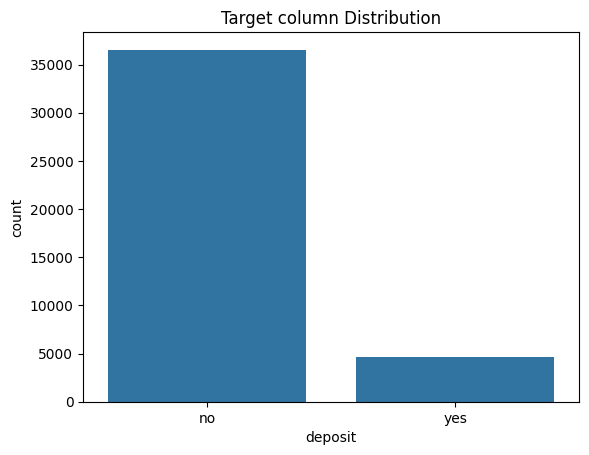

In [78]:
sns.countplot(x='deposit',data=df)
plt.title('Target column Distribution')
plt.show()

From Above graph its showing class imbalanced

In [79]:
df['deposit']=df['deposit'].map({'no':0,'yes':1}) #by using Map function chamged no to 0 yes to 1

In [80]:
df['deposit'].value_counts()

deposit
0    36537
1     4639
Name: count, dtype: int64

In [81]:
#num_col = df.select_dtypes(include =['int64','float64']) #
num_col = df.select_dtypes(exclude=['object']).drop(columns=['deposit'], errors='ignore')



In [82]:
num_col.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [83]:
num_col.skew() #duration,campaign and previous +vly skewed (right skewed) and age slightly skewed,
#pdays -vly left skewed and emp.var.rate slightly left skewed.

age               0.784560
duration          3.262808
campaign          4.762044
pdays            -4.921386
previous          3.831396
emp.var.rate     -0.724061
cons.price.idx   -0.230853
cons.conf.idx     0.302876
euribor3m        -0.709194
nr.employed      -1.044317
dtype: float64

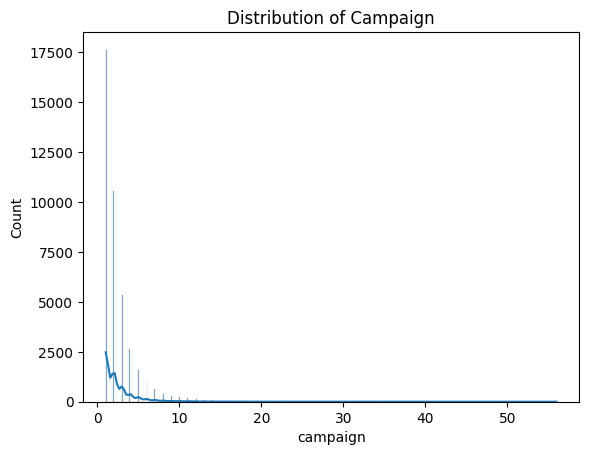

In [84]:
sns.histplot(x=df['campaign'],kde=True)
plt.title('Distribution of Campaign')
plt.show()

As per the above graph campaign is highly right skewed
Campaign =4.7
Highly +ve skewed
*   Most customers were contacted very few times
*   a small no of customers were contacted many time

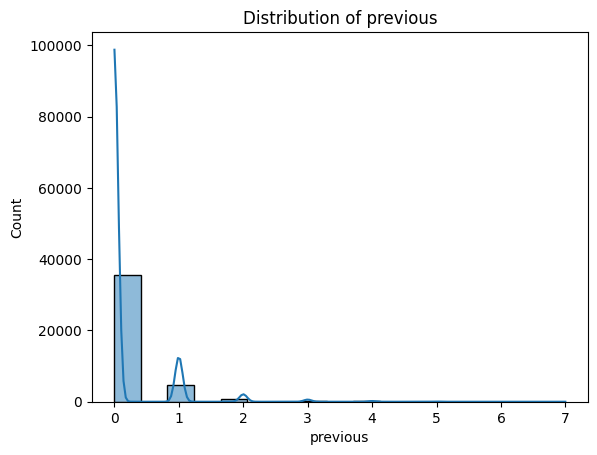

In [85]:
sns.histplot(df['previous'],kde=True)
plt.title('Distribution of previous')
plt.show()

Previous  = 3.8

*   Highly +ve skewed
*   most values are 0
*   Very few customers were contacted before multiple times
*   Most clients not contacted previously

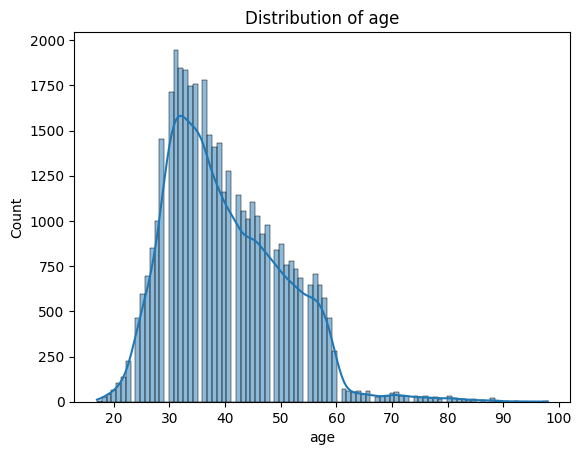

In [86]:
sns.histplot(df['age'],kde=True)
plt.title('Distribution of age')
plt.show()

Age is slightly skewed. campaign duration, previous columns are highly positive skewed. pdays are highly negative skewed.

In [87]:
#log transformation for Campaign and previous column
df['campaign_log']= np.log1p(df['campaign'])
df['previous_log']= np.log1p(df['previous'])

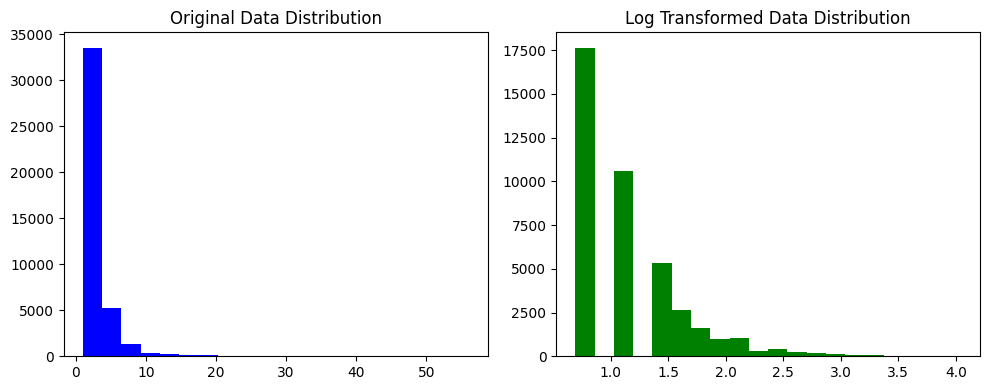

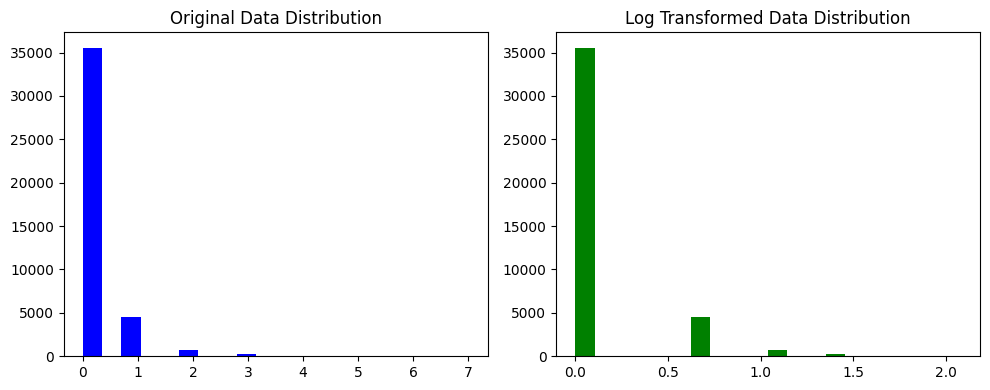

In [88]:
# 1. Visual Comparison (Histograms)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(df['campaign'],bins=20, color='blue')
axes[0].set_title('Original Data Distribution')
axes[1].hist(df['campaign_log'],bins=20, color='green')
axes[1].set_title('Log Transformed Data Distribution')
plt.tight_layout()
plt.show()

# 1. Visual Comparison (Histograms)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(df['previous'],bins=20,color='blue')
axes[0].set_title('Original Data Distribution')
axes[1].hist(df['previous_log'],bins=20,color='green')
axes[1].set_title('Log Transformed Data Distribution')
plt.tight_layout()
plt.show()

In [89]:
print(df['campaign_log'].skew())  #after log transformation value got reduced
print(df['previous_log'].skew())

1.3502653832482818
2.5865105618409516


pdays = highly negative skewed here u need to understand this column
no of days since the customer was last contacted in a previous capmpaign
999 -> customer was not previously contacted
Most numners are 999 very few are actual numbers

In [90]:
df['pdays'].value_counts() #highest value is 999 remaining are few numbers 

pdays
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

Box-Cox Transformation for pdays column

In [91]:
df['pdays_transform']= df['pdays'].apply(lambda x:0 if x==999 else 1) #Box-Cox transformation
#this converts it to 0 or 1

In [92]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit', 'campaign_log',
       'previous_log', 'pdays_transform'],
      dtype='object')

**Numerical data distribution Analysis**

In [93]:
num_col.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

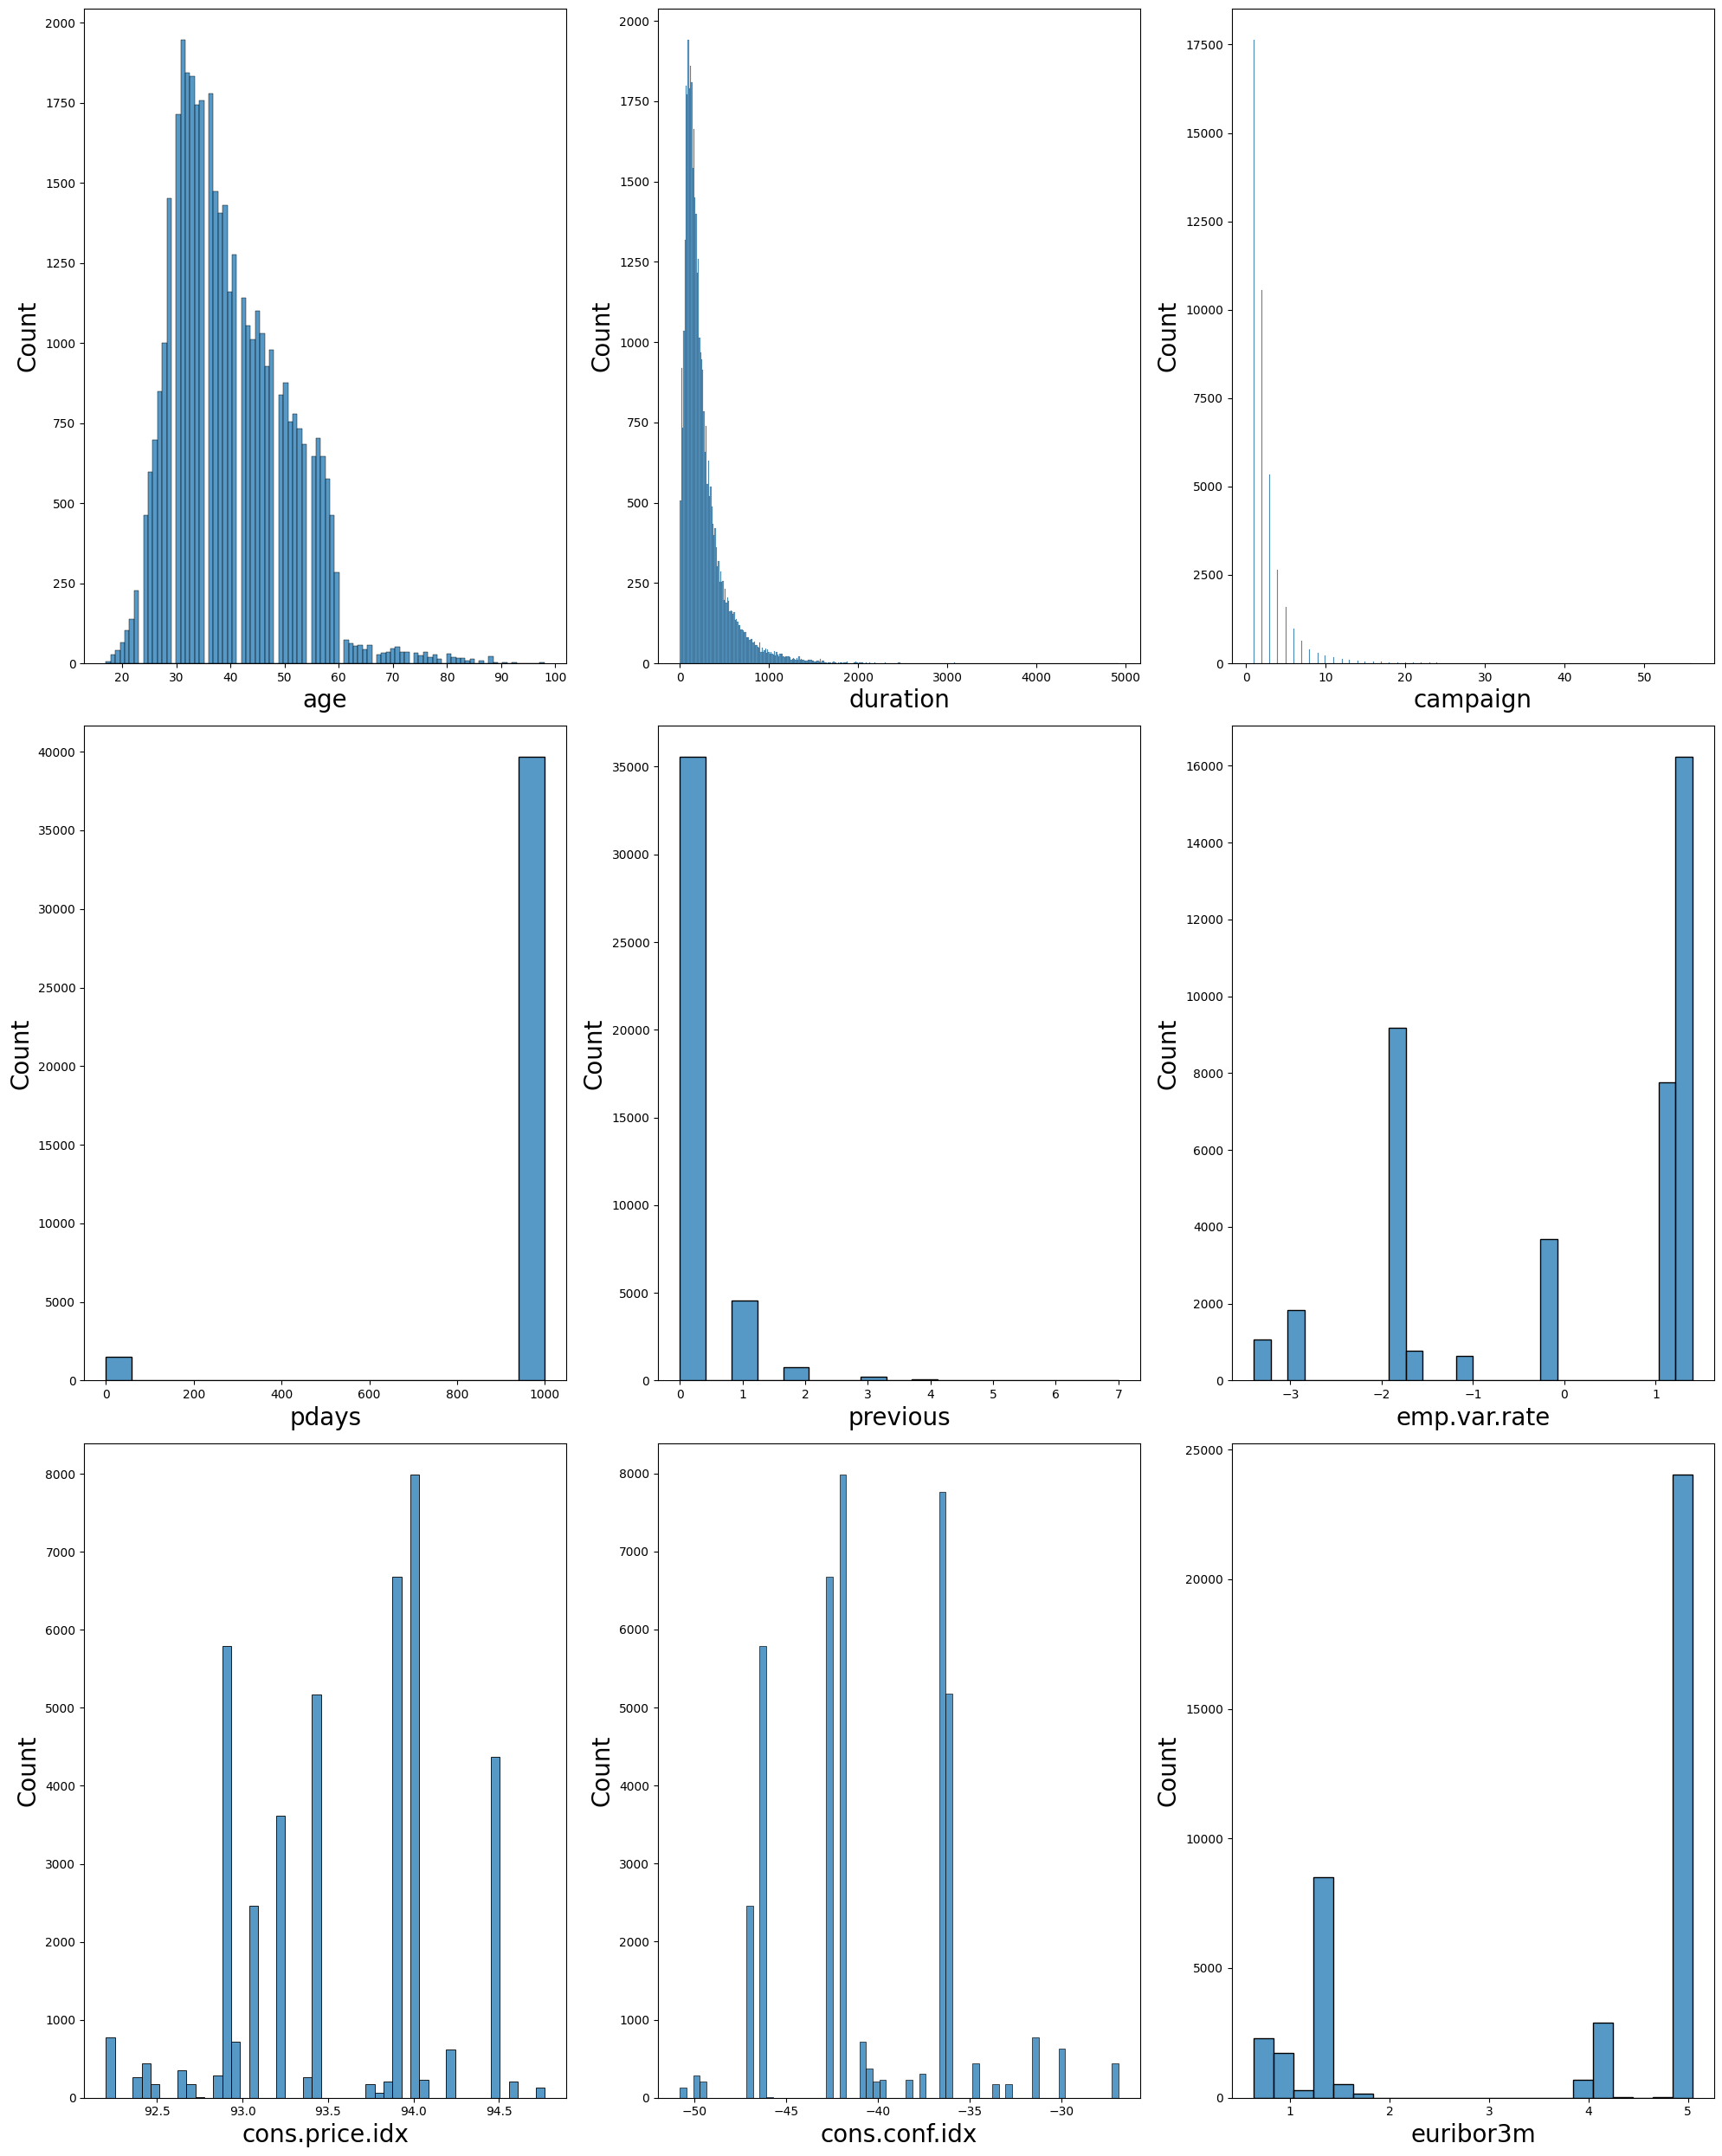

In [94]:
#Histogram for checking data distribution for numerical columns

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for col in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[col])
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

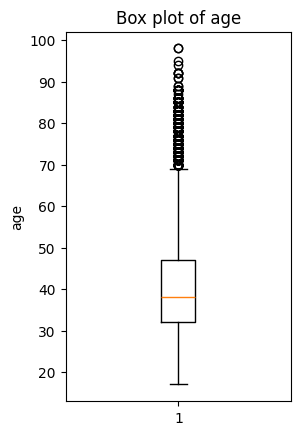

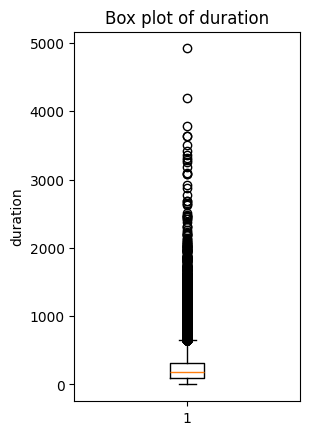

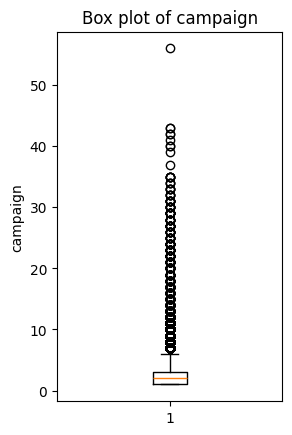

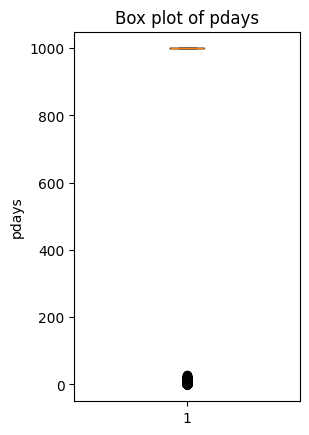

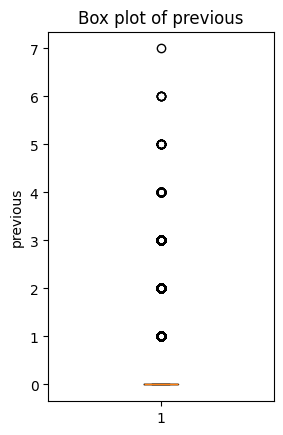

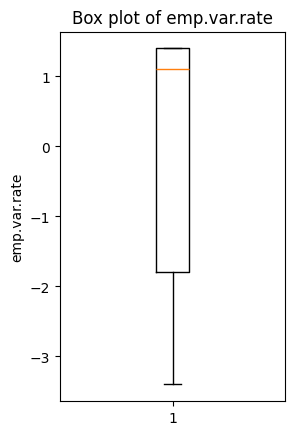

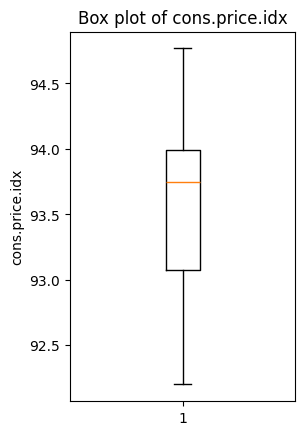

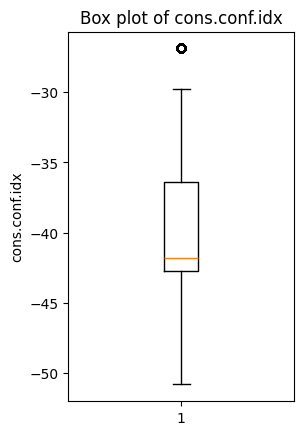

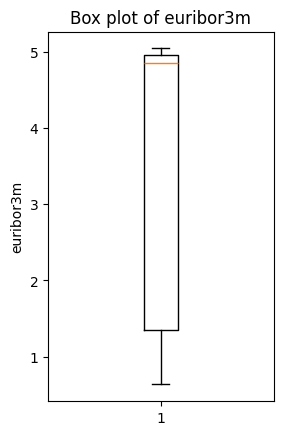

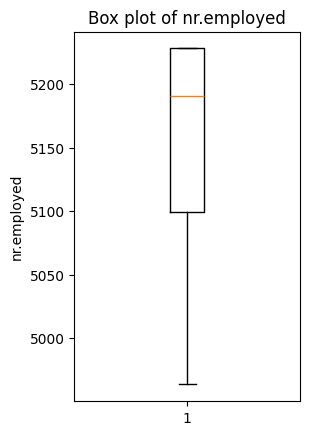

In [95]:
#Boxplot for finding Outliers present in numerical columns

for col in num_col:
  plt.subplot(1,2,2)
  plt.boxplot(df[col])
  plt.title(f'Box plot of {col}')
  plt.ylabel(col)
  plt.show()

Columns with outliers based on Boxplot: 'age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx'
use IQR Technique to reduce the outliers

In [96]:
def cap_outliers(df,columns):
   Q1 = df[columns].quantile(0.25)
   Q3 = df[columns].quantile(0.75)
   IQR = Q3-Q1
   lower = Q1 -1.5*IQR
   upper = Q3+ 1.5*IQR
   df[columns] = df[columns].clip(lower,upper)
   return df

for col in num_col:
    df = cap_outliers(df,col)

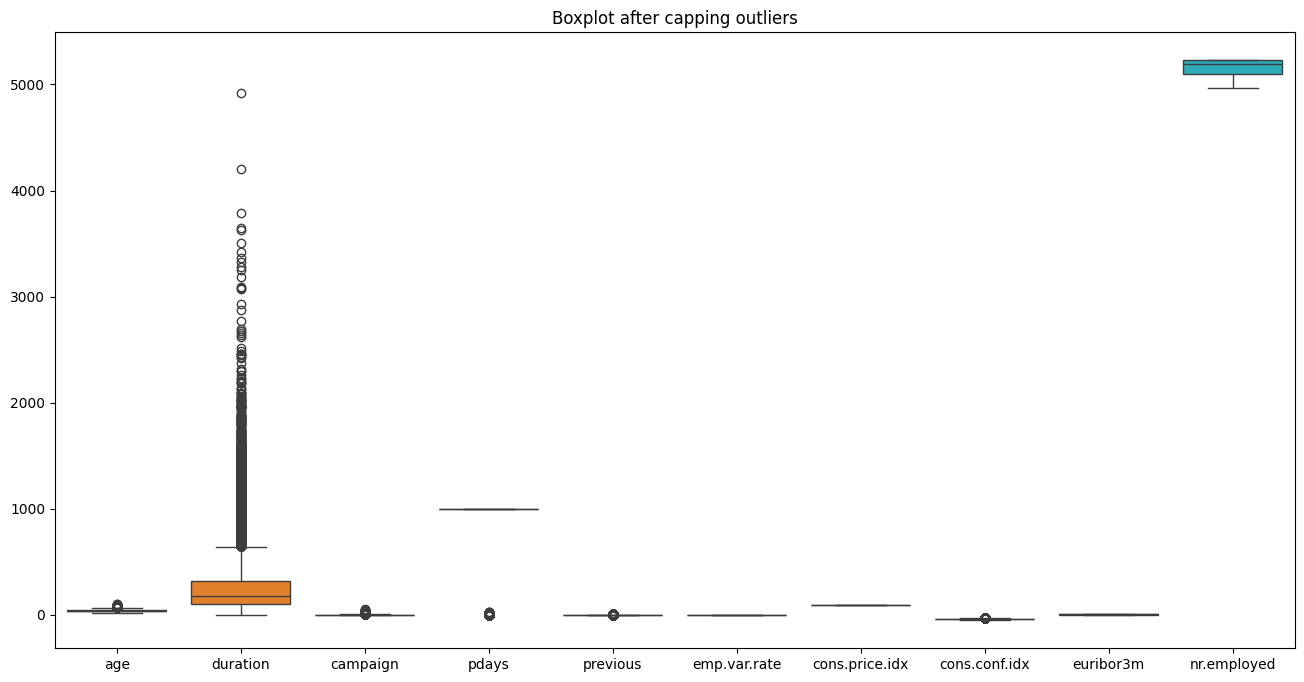

In [97]:
plt.figure(figsize =(16,8))
sns.boxplot(data=num_col)
plt.title("Boxplot after capping outliers")
plt.show()

In [98]:
corr_matrix= num_col.corr() #find correlation between features
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


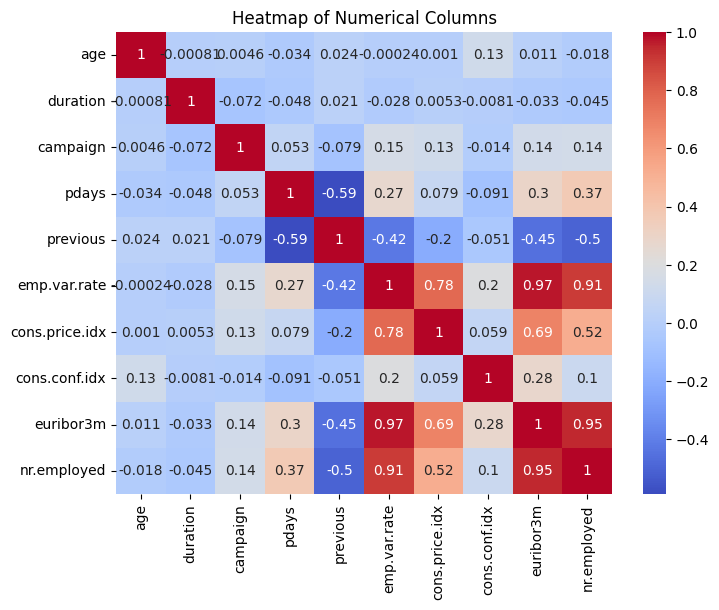

In [99]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Heatmap of Numerical Columns")
plt.show()

In [100]:
cat_cols = df.select_dtypes(include=['object','bool','category'])

Multivariate Analysis

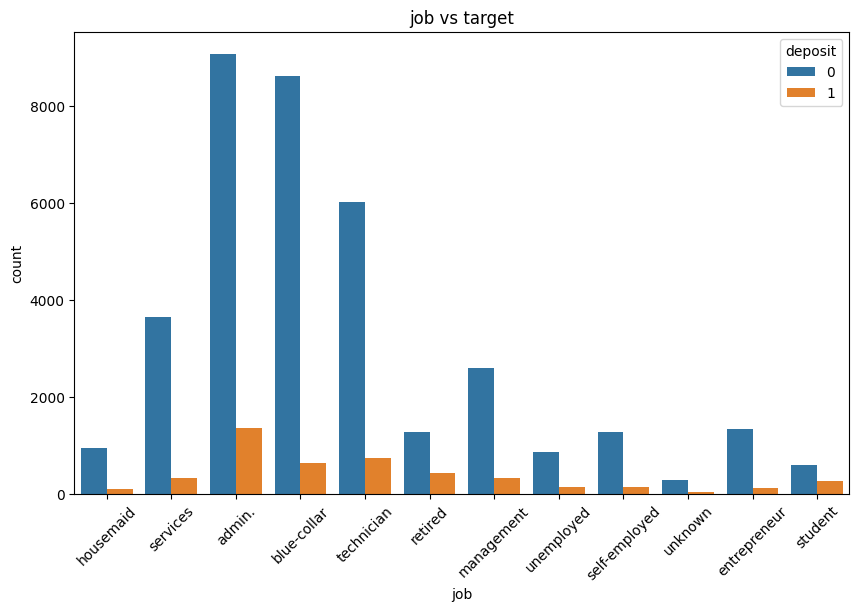

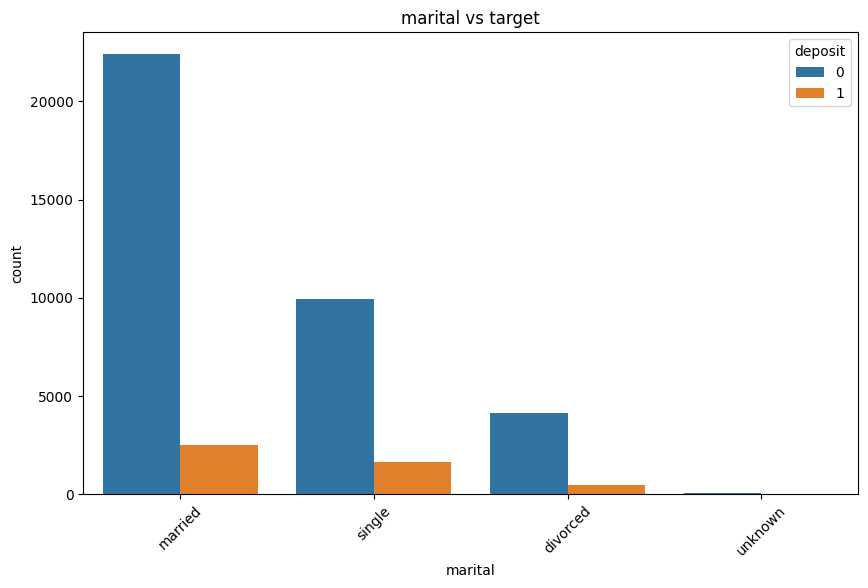

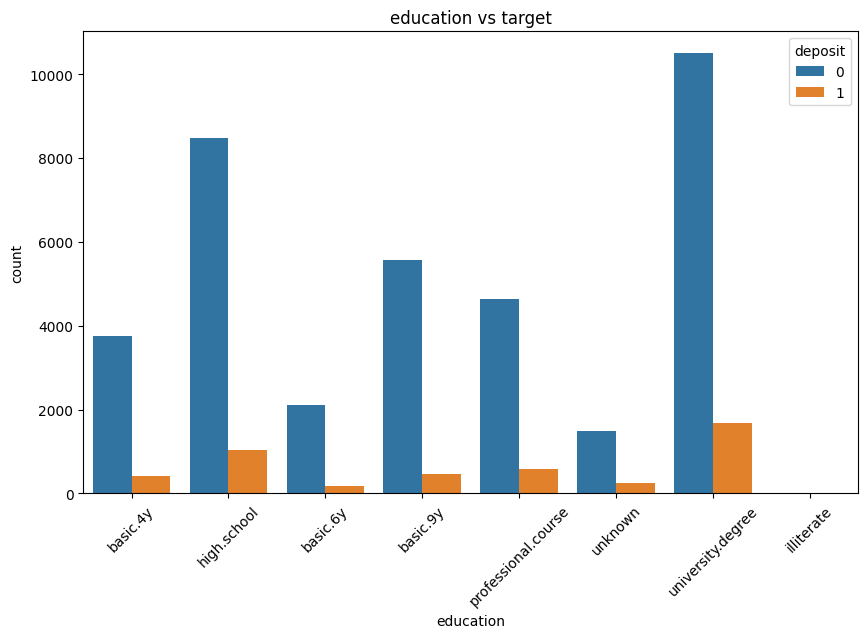

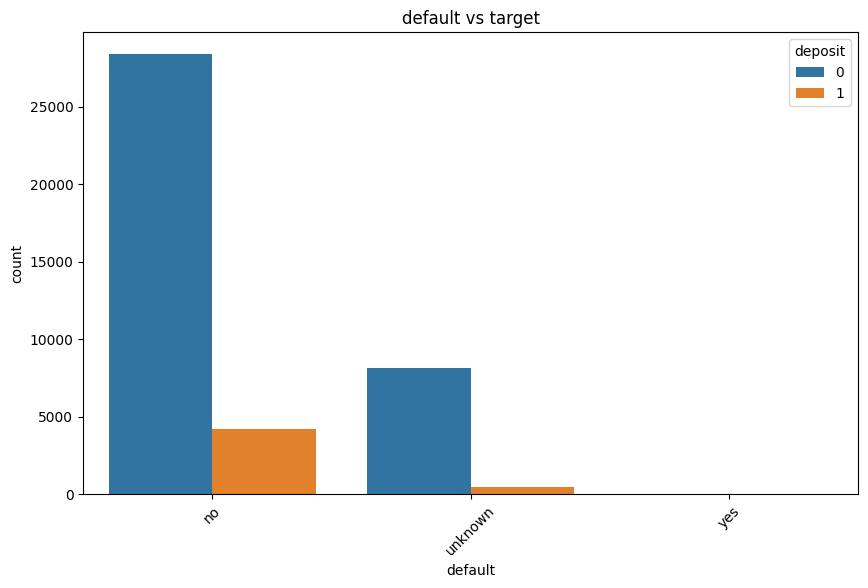

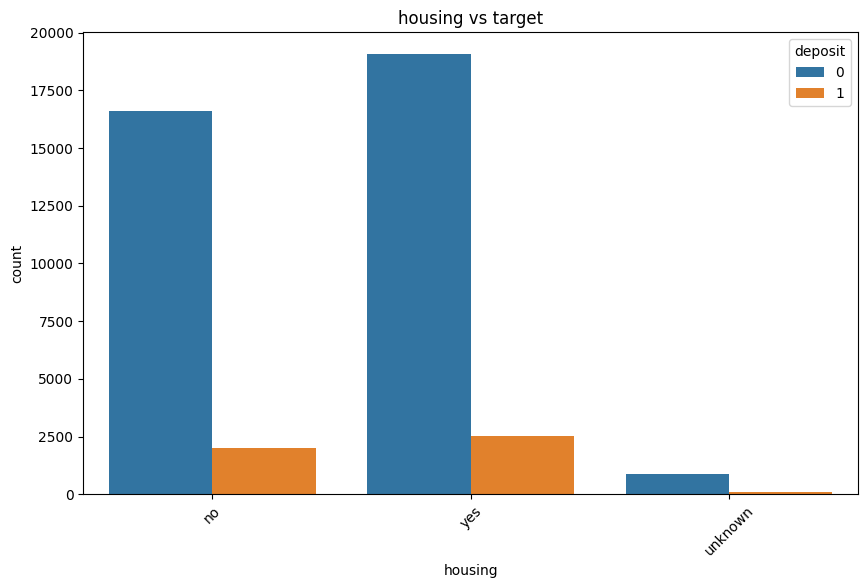

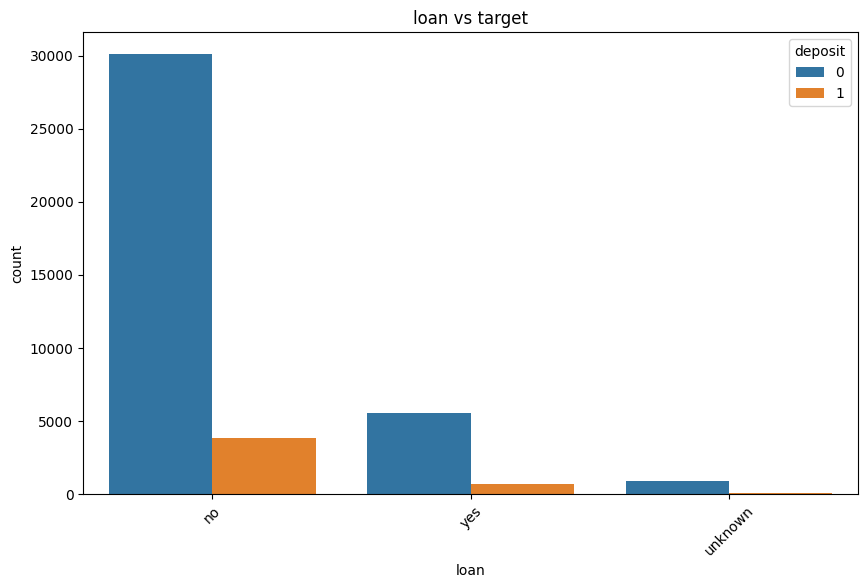

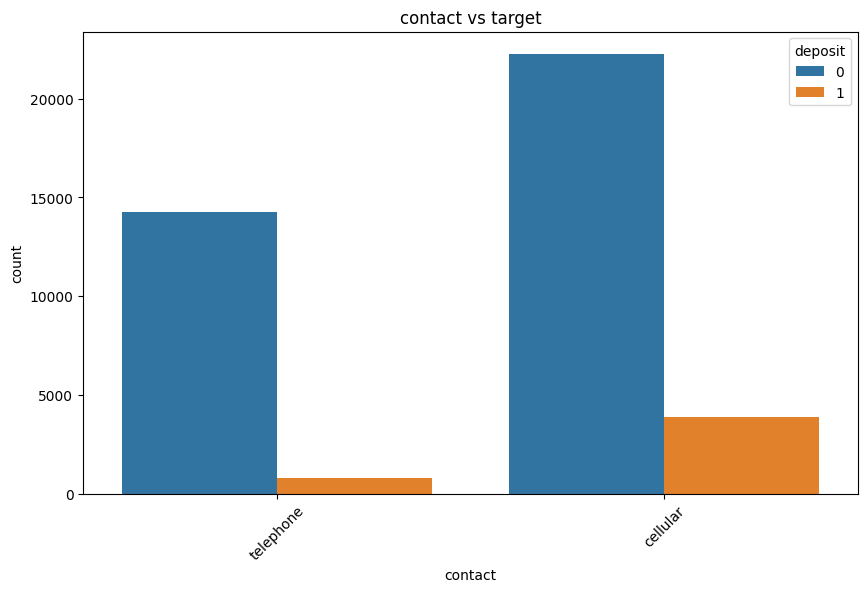

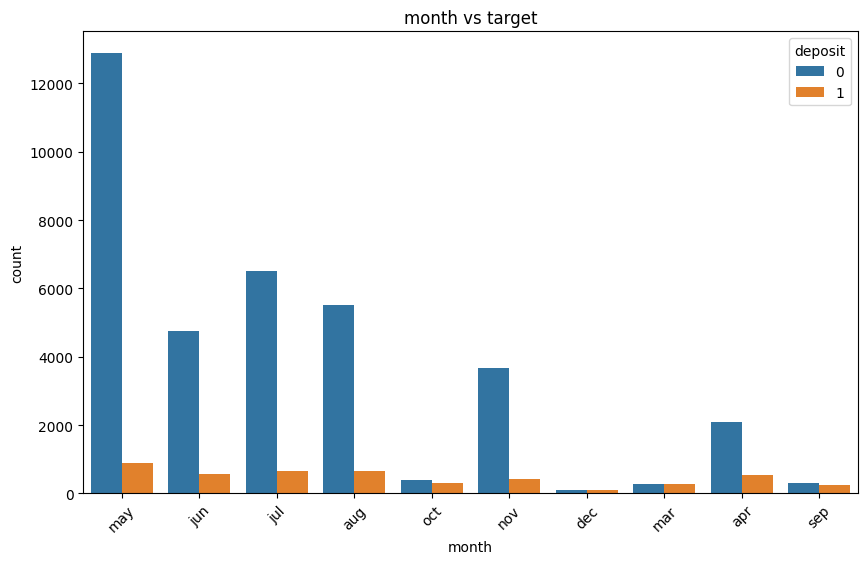

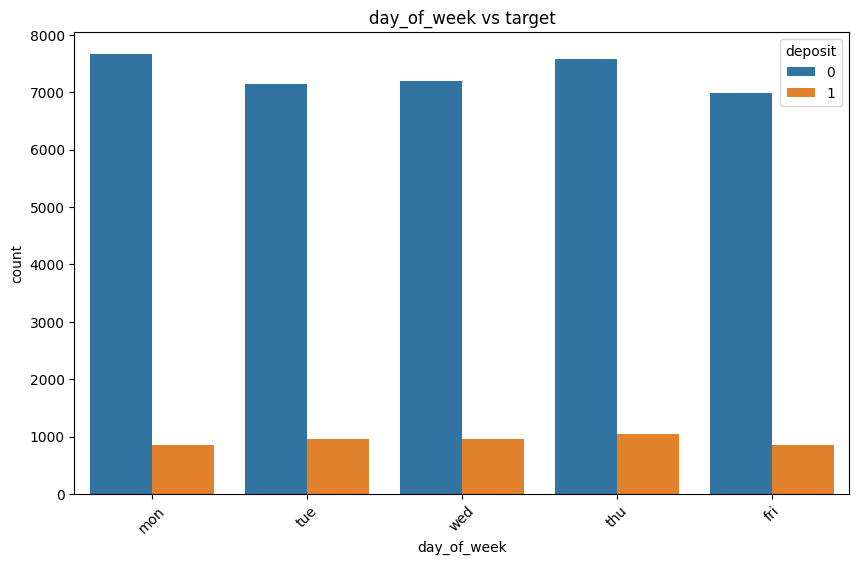

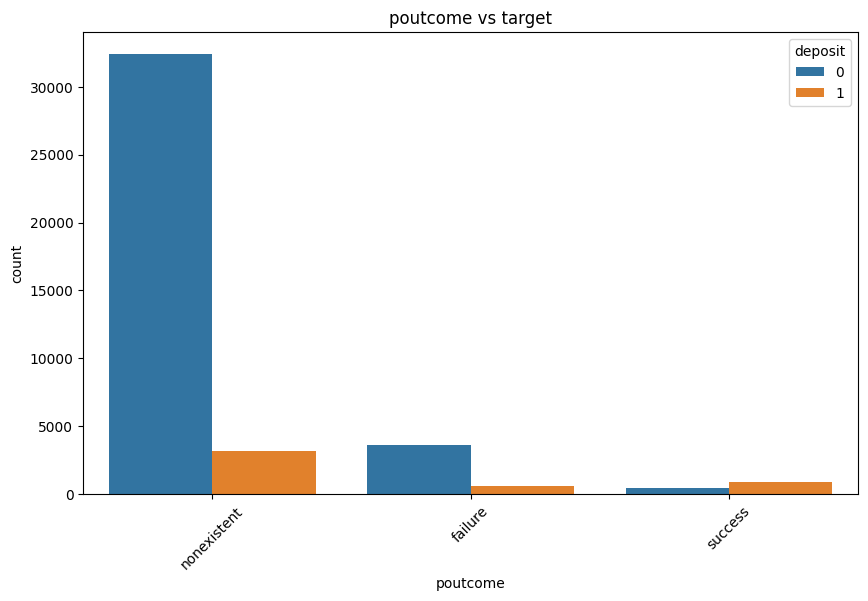

In [101]:
for col in cat_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(x=df[col],hue=df['deposit'])
  plt.title(f'{col} vs target')
  plt.ylabel('count')
  plt.xticks(rotation=45)
  plt.show()

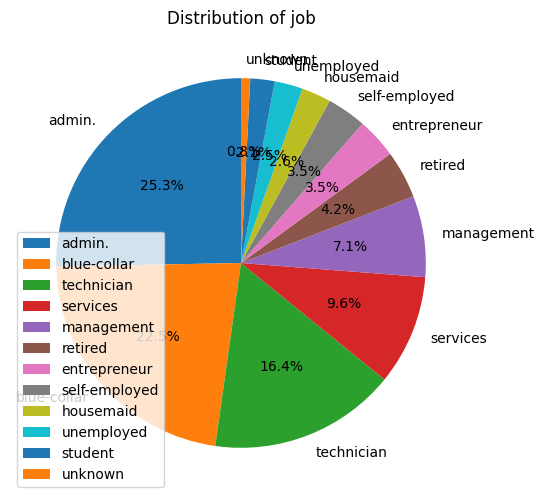

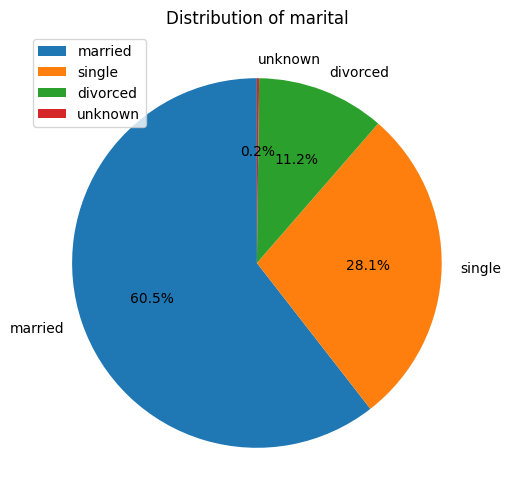

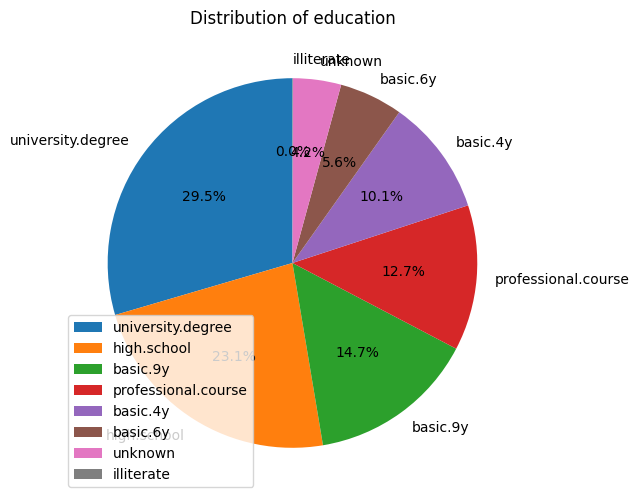

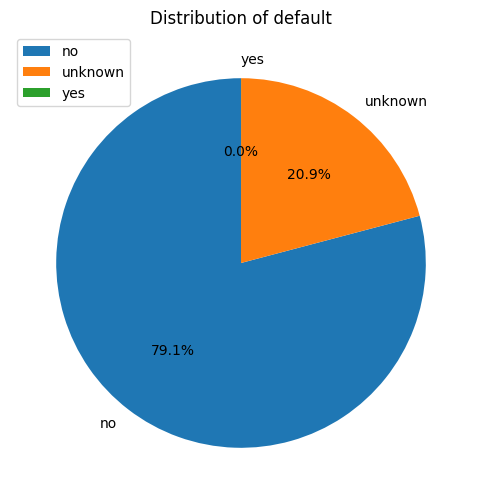

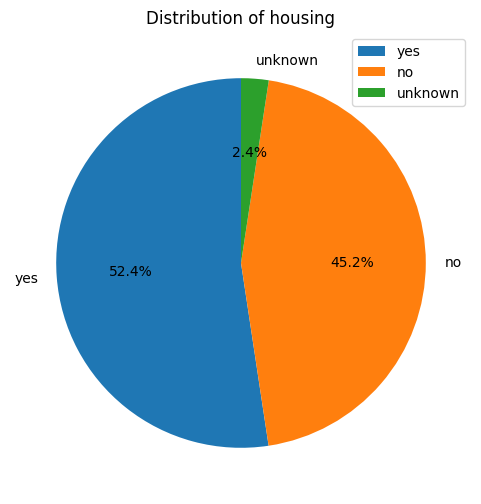

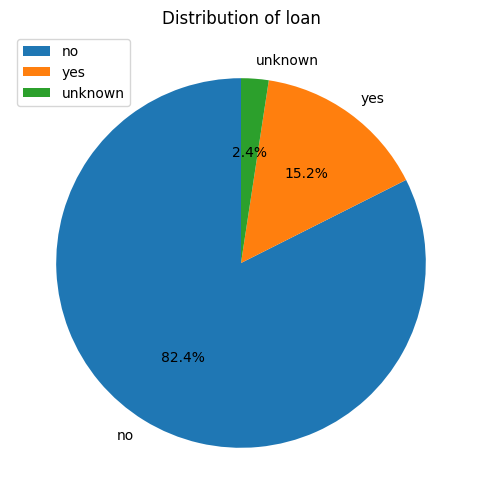

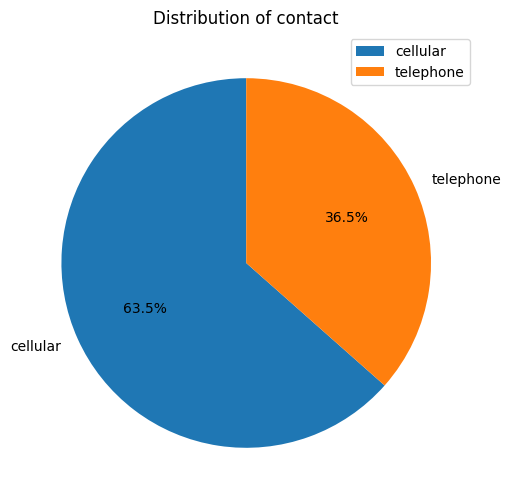

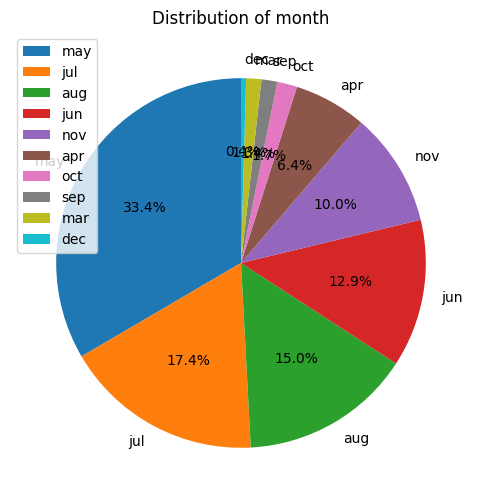

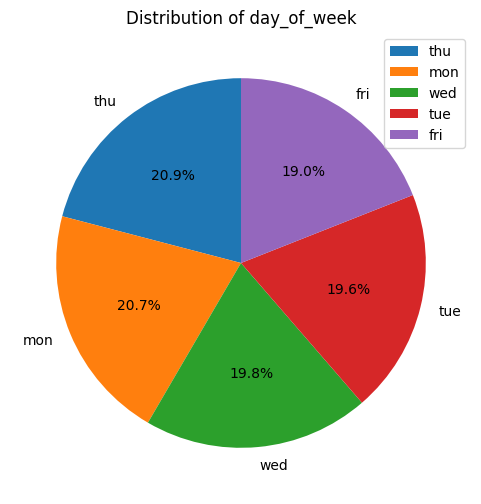

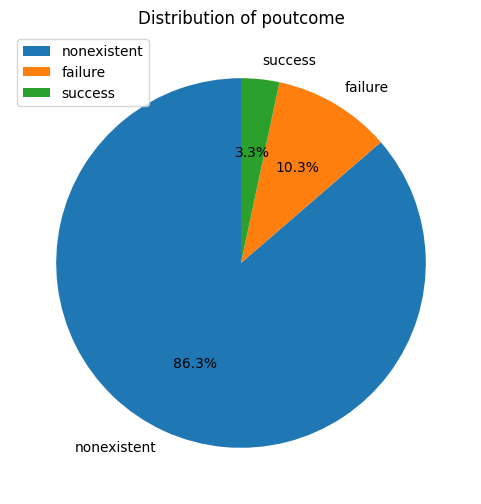

In [102]:
for col in cat_cols:
   counts = df[col].value_counts()

   plt.figure(figsize=(6,6))
   plt.pie(counts,labels= counts.index, autopct='%1.1f%%',startangle=90)
   plt.title(f'Distribution of {col}')
   plt.legend()
   plt.show()

Do encoding to change from categorical to numerical .

**if its nominal** **(no order)**
ex: job,maritial, month,default, housing, loan, poutcome...
**use one hot encoding**

**Ordinal (order**)
ex: education
**use Label encoding or ordinal encoding**

In [103]:
df['education'].value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [104]:
# ordinal encoding for Education
education_order=['unknown','illiterate','basic.4y','basic.6y','basic.9y','high.school','professional.course','university.degree']

ord_enc = OrdinalEncoder(categories=[education_order])
df['education']= ord_enc.fit_transform(df[['education']])

In [105]:
df['education']

0        2.0
1        5.0
2        5.0
3        3.0
4        5.0
        ... 
41183    6.0
41184    6.0
41185    7.0
41186    6.0
41187    6.0
Name: education, Length: 41176, dtype: float64

In [106]:
# ;labe; encoding
label_enc= ['job','marital','default','housing','loan','contact','month', 'day_of_week', 'poutcome']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in label_enc:
    df[col]=le.fit_transform(df[col])


In [107]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,campaign_log,previous_log,pdays_transform
0,56.0,3,1,2.0,0,0,0,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,0,0.693147,0.0,0
1,57.0,7,1,5.0,1,0,0,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,0,0.693147,0.0,0


In [108]:
df.shape

(41176, 24)

In [109]:
df=df.replace({True:1,False:0})

In [110]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,campaign_log,previous_log,pdays_transform
0,56.0,3,1,2.0,0,0,0,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,0,0.693147,0.0,0
1,57.0,7,1,5.0,1,0,0,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,0,0.693147,0.0,0


In [111]:
df['deposit'].value_counts()

deposit
0    36537
1     4639
Name: count, dtype: int64

In [112]:
x= df.drop(['deposit','duration','pdays'],axis=1)
y=df['deposit']
print(x)

        age  job  marital  education  default  housing  loan  contact  month  \
0      56.0    3        1        2.0        0        0     0        1      6   
1      57.0    7        1        5.0        1        0     0        1      6   
2      37.0    7        1        5.0        0        2     0        1      6   
3      40.0    0        1        3.0        0        0     0        1      6   
4      56.0    7        1        5.0        0        0     2        1      6   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183  69.5    5        1        6.0        0        2     0        0      7   
41184  46.0    1        1        6.0        0        0     0        0      7   
41185  56.0    5        1        7.0        0        2     0        0      7   
41186  44.0    9        1        6.0        0        0     0        0      7   
41187  69.5    5        1        6.0        0        2     0        0      7   

       day_of_week  ...  previous  pout

Performing SMOTE to correct the imbalanced class

In [113]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
x,y = resampler.fit_resample(x,y)
y.value_counts()

deposit
0    36537
1    36537
Name: count, dtype: int64

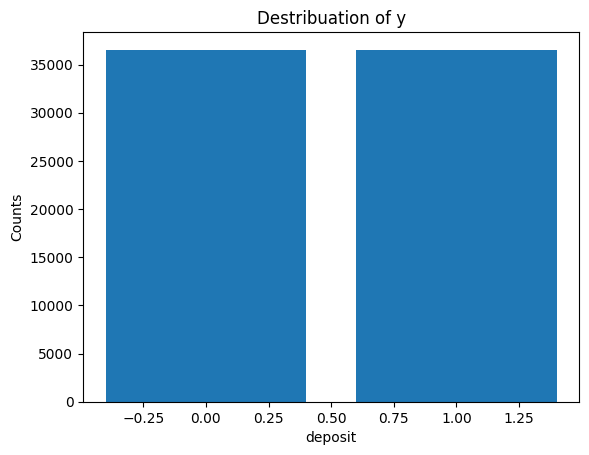

In [114]:
counts=y.value_counts()
plt.bar(counts.index,counts.values)
plt.title('Destribuation of y')
plt.xlabel('deposit')
plt.ylabel('Counts')
plt.show()

**Scaling our data**

In [115]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

x = sc.fit_transform(x)

Split the data into trainn and test

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y) # stratify keeps same class ratio in train & test

Modeling using 4 Different Algorithm

In [117]:
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'KNN': KNeighborsClassifier()
          }

---Logistic Regression---
Accuracy : 0.7865
Precsion: 0.8044
F1 Score:0.7800
Recall : 0.7571
confusion Matrix:
[[5963 1345]
 [1775 5532]]
ROC AUC: 0.7865
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      7308
           1       0.80      0.76      0.78      7307

    accuracy                           0.79     14615
   macro avg       0.79      0.79      0.79     14615
weighted avg       0.79      0.79      0.79     14615


---Decision Tree---
Accuracy : 0.9047
Precsion: 0.8977
F1 Score:0.9055
Recall : 0.9135
confusion Matrix:
[[6547  761]
 [ 632 6675]]
ROC AUC: 0.9047
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7308
           1       0.90      0.91      0.91      7307

    accuracy                           0.90     14615
   macro avg       0.90      0.90      0.90     14615
weighted avg       0.90      0.90      0.90     14615


---Random Forest---
Accuracy : 0.9370
Prec

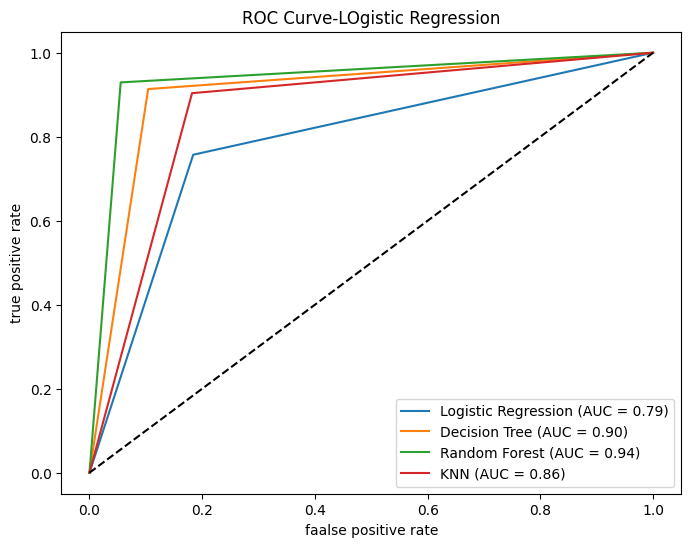

In [123]:
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

results={}
plt.figure(figsize=(8,6))
for name, model in models.items():
     # Train model
     model.fit(x_train,y_train)

     #Prediction
     y_pred = model.predict(x_test)

     #Probability for ROC
     if hasattr(model, "Predict_proba"):
         y_prob =model.predict_proba(x_test)[:,1]
     else:
         y_prob =model.predict(x_test)

     #metrics
     f1 = f1_score(y_test,y_pred)
     recall =recall_score(y_test,y_pred)
     cm = confusion_matrix(y_test,y_pred)
     roc_auc = roc_auc_score(y_test,y_pred)
     pre = precision_score(y_test,y_pred)


    #accuracy
     acc = accuracy_score(y_test,y_pred)
     results[name] =acc

     print(f"---{name}---")
     print(f"Accuracy : {acc:.4f}")
     print(f"Precsion: {pre:.4f}")
     print(f"F1 Score:{f1:.4f}")
     print(f"Recall : {recall:.4f}")
     print("confusion Matrix:")
     print(cm)
     print(f"ROC AUC: {roc_auc:.4f}")
     print(classification_report(y_test,y_pred))
     print(f"{'='*30}\n")

    #Roc Curve
     fpr,tpr,_= roc_curve(y_test,y_prob)
     plt.plot(fpr,tpr,label= f'{name} (AUC = {roc_auc:.2f})')

#final ROC Plot
plt.plot([0,1],[0,1],'k--')
plt.xlabel('faalse positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve-LOgistic Regression')
plt.legend()
plt.show()

Based on Confusion MAtrix
Logistic Regression: 
High False Positive
High False Negative
Model confused on both class
What this tells: Logistic Regression is underfitting, Weak model compared to others

Decision Tree:
False negative reduces a loy
Much better class separation
Some overfitting issues, need tuning

Random Forest:
Lowest Fp
Lowest FN
Balanced Prediction
best model compared to all 

KNN:
FP still high
FN better than Logistic
Worse compared to Tre and RF


I evaluated multiple classification models using confusion matrices, precision,recall and F1-score
Random Forest achievedthe best balance with the lowest false positive and false negative,making it the most reliable model for this problem.


